In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Load the Dataset

In [2]:
data = pd.read_excel('audit_risk.xlsx')

In [3]:
data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832


In [63]:
data['History'].unique()

array([0, 1, 2, 3, 9, 5, 4], dtype=int64)

# Perform Exploratory Data Analysis on the data

In [4]:
data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
dtype: int64

In [5]:
data['Money_Value'].value_counts()

0.00     332
0.04      11
0.02       9
0.06       8
0.05       7
        ... 
22.10      1
8.38       1
4.24       1
34.32      1
2.40       1
Name: Money_Value, Length: 328, dtype: int64

In [6]:
data['Money_Value'].unique()

array([3.3800e+00, 9.4000e-01, 0.0000e+00, 1.1750e+01, 2.9500e+00,
       4.4950e+01, 7.7900e+00, 7.3400e+00, 1.9300e+00, 4.4200e+00,
       9.6000e-01, 1.0430e+01, 7.0000e-03, 9.0000e+00, 4.1280e+01,
       1.4030e+01, 6.3180e+01, 3.4240e+01, 1.0000e-02, 2.0519e+02,
       1.0000e-01, 1.1160e+01, 1.2500e+00, 1.4600e+00, 6.7800e+00,
       1.1600e+00, 1.5241e+02, 1.0800e+00, 2.8400e+00, 9.0000e-01,
       9.6700e+00, 3.2680e+01, 9.3503e+02, 2.9630e+01, 1.1000e-01,
       2.6200e+00, 6.0000e-02, 2.4300e+00, 1.2613e+02, 2.0790e+01,
       1.5692e+02, 1.2290e+01, 2.2900e+00, 7.7800e+00, 2.5100e+00,
       8.3100e+00, 1.6000e-01, 4.7900e+01, 8.9100e+00, 4.9500e+00,
       1.7500e+00, 6.8000e-01, 1.5820e+01, 5.8000e-01, 2.1531e+02,
       5.0000e-02, 5.3340e+01, 1.0690e+01, 5.6900e+00, 1.3500e+00,
       1.1690e+01, 1.4600e+01, 2.0780e+01, 1.0222e+02, 7.4000e-01,
       8.7337e+02, 1.4000e+00, 4.2000e-01, 3.6520e+01, 6.0200e+00,
       1.7160e+01, 1.2910e+01, 1.0790e+01, 3.4600e+00, 2.3300e

In [8]:
data['Money_Value'] = data['Money_Value'].fillna(data['Money_Value'].median())

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     776 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [11]:
data.shape

(776, 26)

In [15]:
df = data.drop('LOCATION_ID',axis=1)

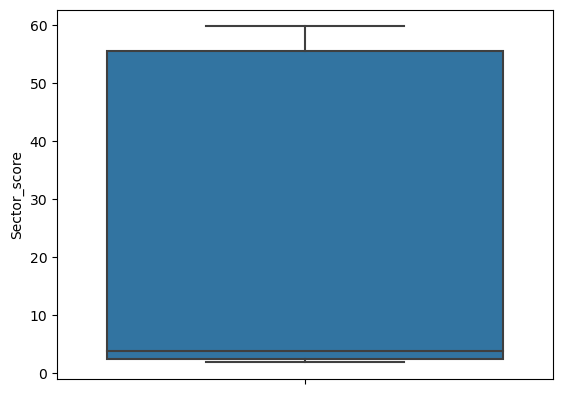

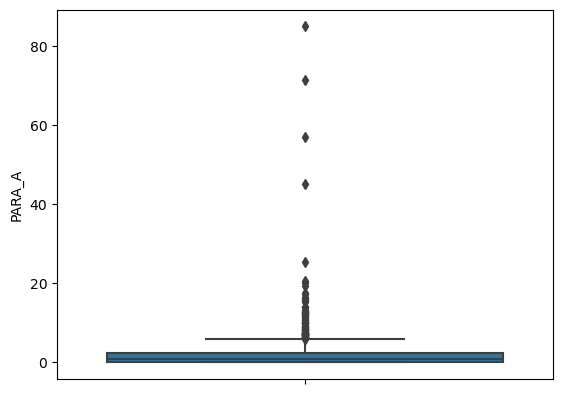

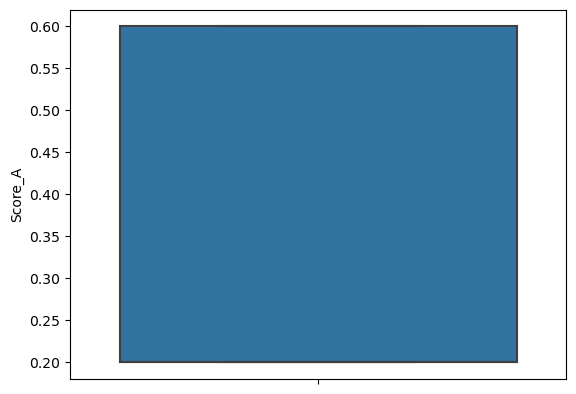

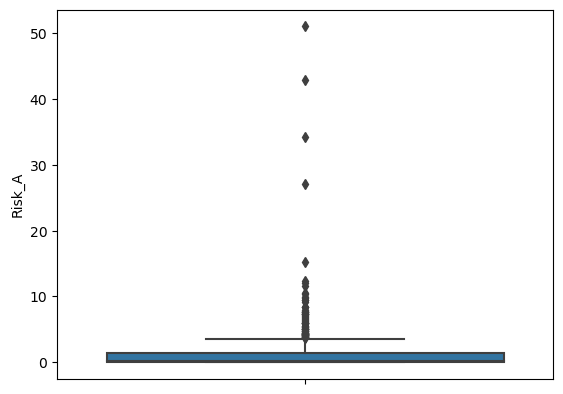

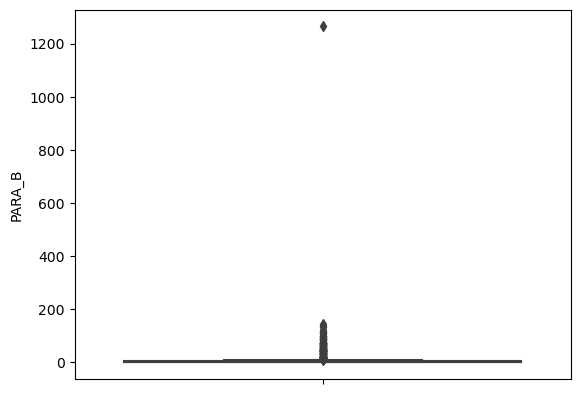

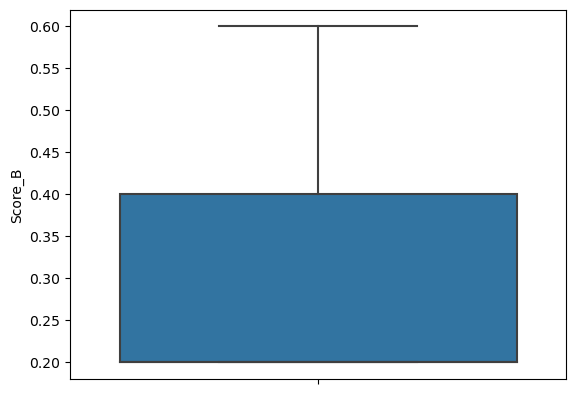

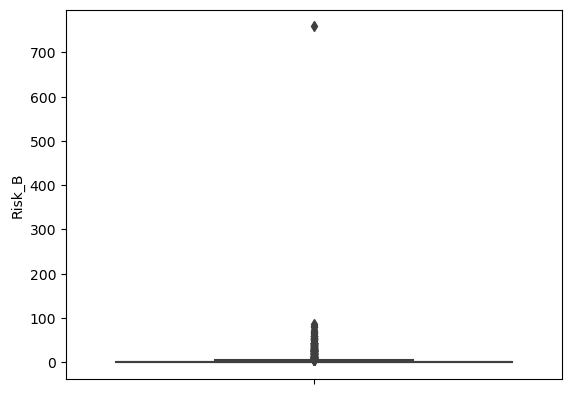

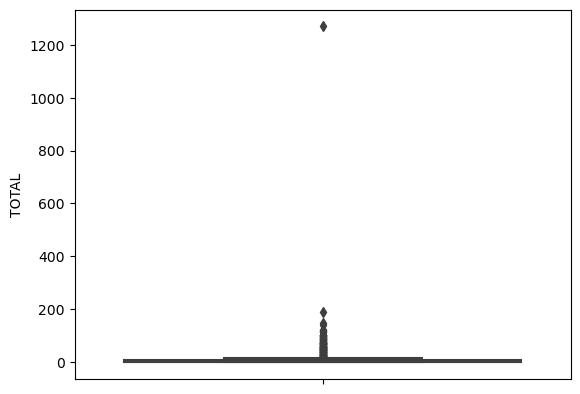

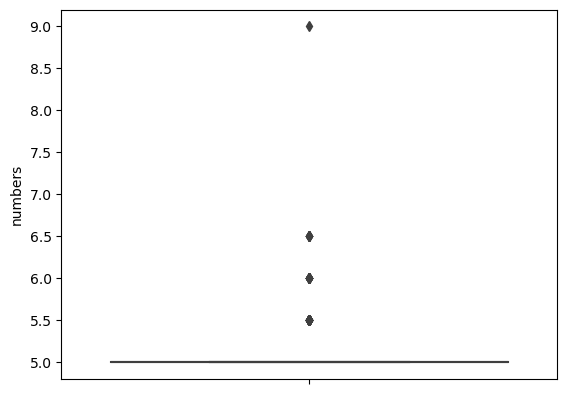

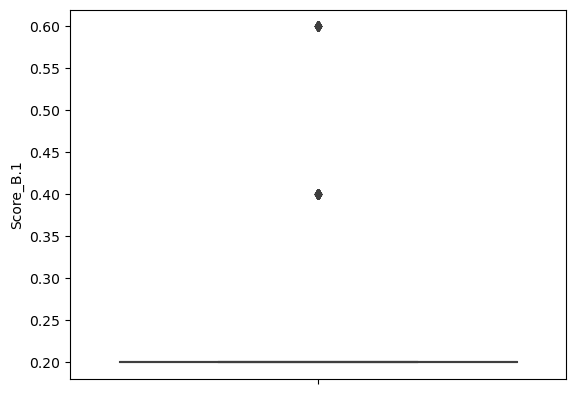

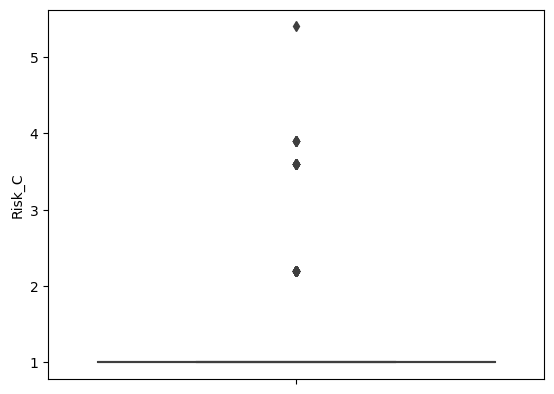

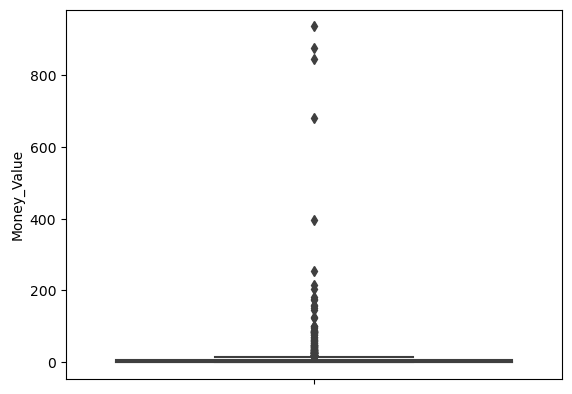

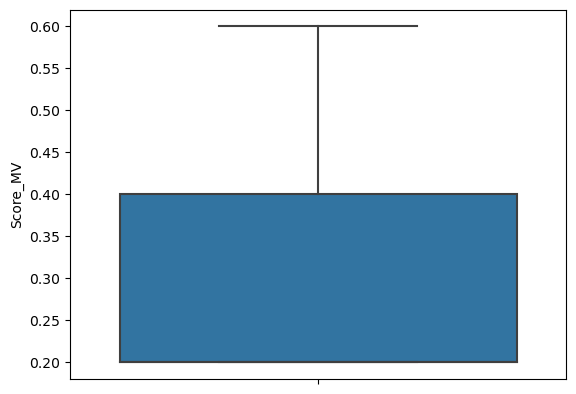

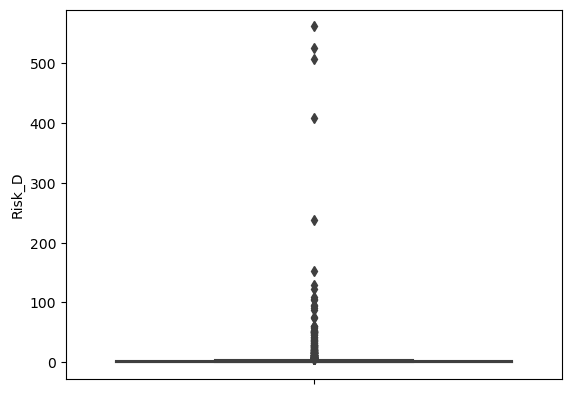

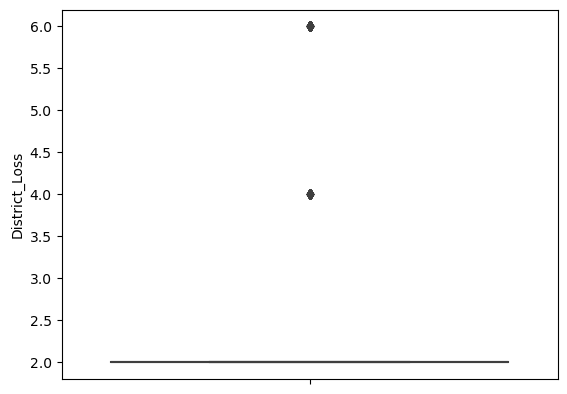

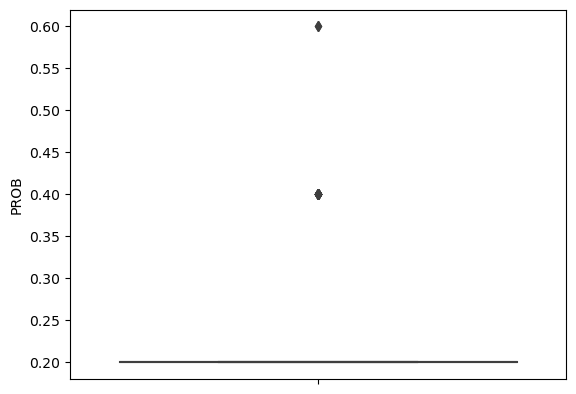

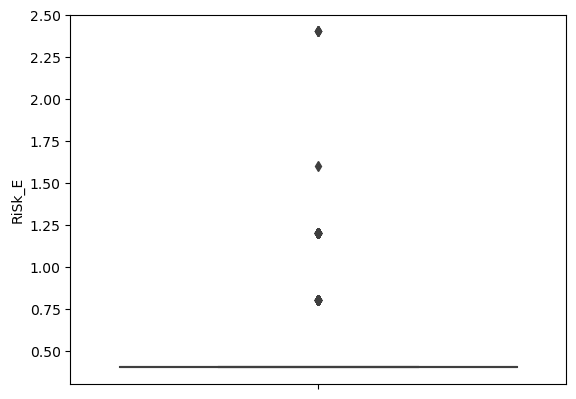

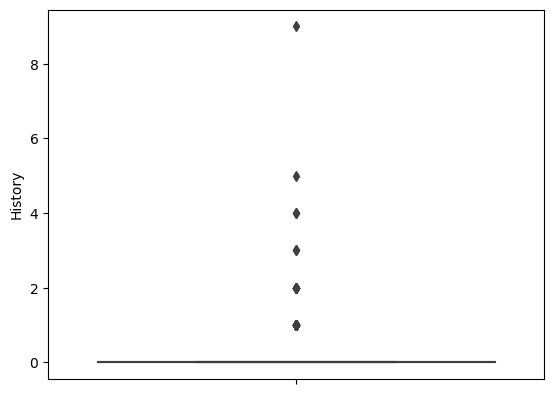

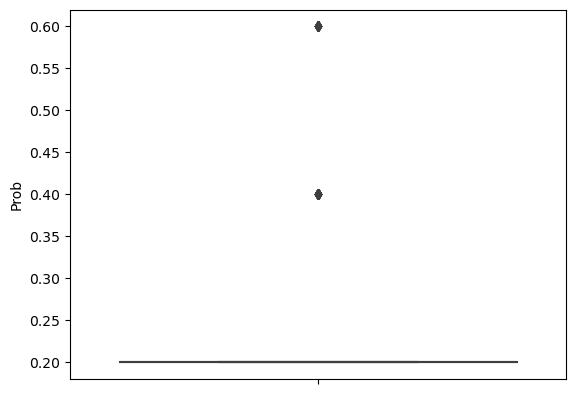

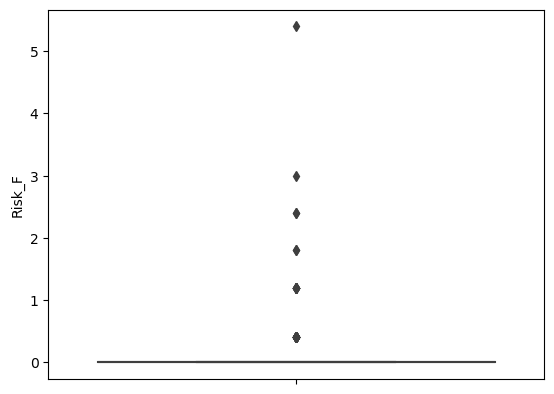

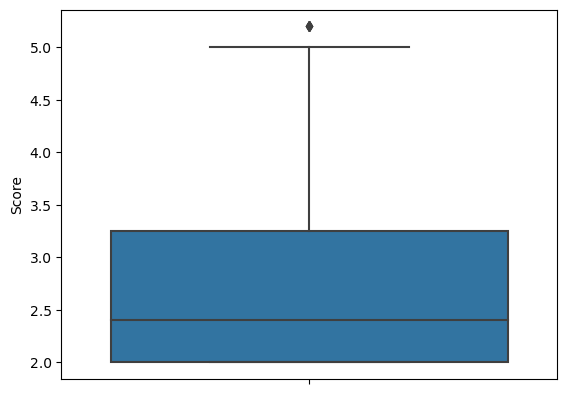

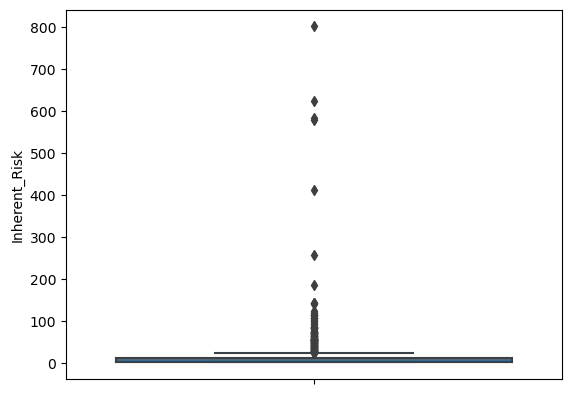

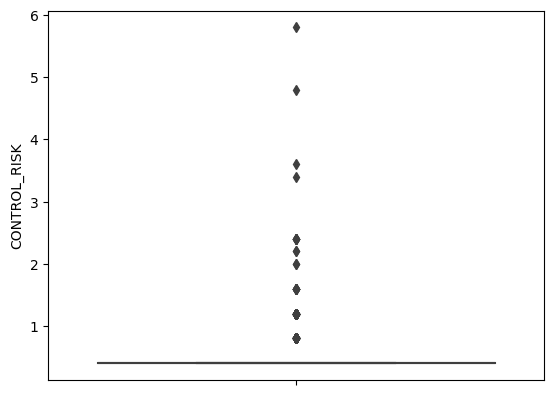

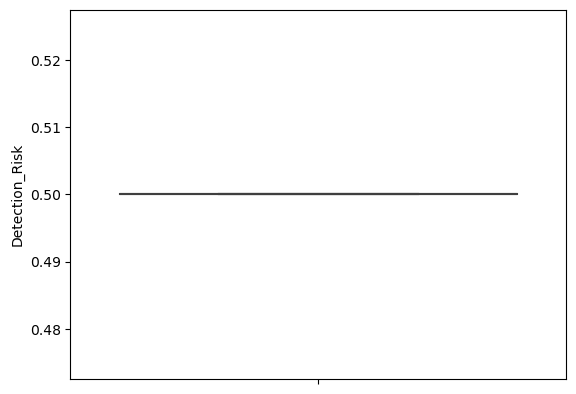

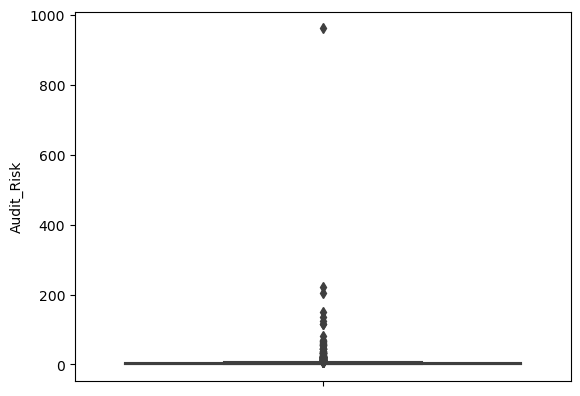

In [16]:
for col in df.columns:
    sns.boxplot(y=df[col])
    plt.show()

In [17]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr

In [1]:
df = df[~((df>ul)|(df<ll)).any(axis=1)]

NameError: name 'df' is not defined

In [ ]:
df.shape

# Build a K- Means Clustering algorithm and share your findings

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_sc = sc.fit_transform(df)
df_sc = pd.DataFrame(df_sc,columns=df.columns)
df_sc.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,-0.909177,3.375529,2.368927,3.603945,1.296184,-0.378139,0.297012,2.679144,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.500307,4.685398,0.0,0.0,4.685398
1,-0.909177,-0.822767,-0.593828,-0.584606,2.956885,-0.378139,0.931171,1.722195,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.538362,0.259199,0.0,0.0,0.259199
2,-0.909177,-0.310534,-0.593828,-0.414258,-0.321751,-0.378139,-0.320816,-0.393438,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.538362,-0.480461,0.0,0.0,-0.480461
3,-0.909177,-0.822767,-0.593828,-0.584606,-0.428664,-0.378139,-0.361642,-0.734836,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.538362,-0.577514,0.0,0.0,-0.577514
4,-0.909177,-0.822767,-0.593828,-0.584606,0.105897,-0.378139,-0.157514,-0.346884,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.538362,-0.033430,0.0,0.0,-0.033430


In [21]:
from sklearn.cluster import KMeans

In [22]:
error = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df_sc)
    error.append(km.inertia_)
error

[6495.999999999999,
 3806.884771701727,
 2778.105459143337,
 1970.5037070687242,
 1584.946466085668,
 1330.6236192824854,
 1113.5700892374464,
 926.8901819447792,
 807.134269961093,
 729.8867094304609]

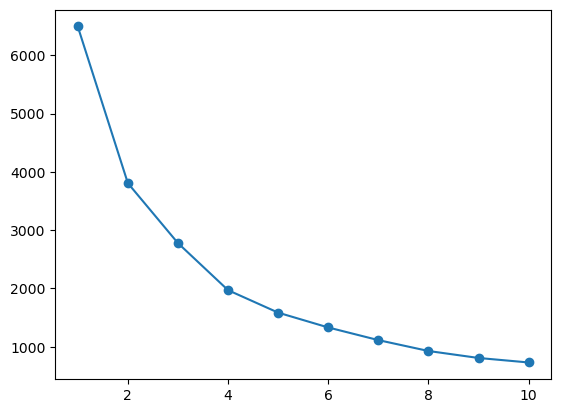

In [23]:
plt.plot(range(1,11),error,marker='o')
plt.show()

In [24]:
#So the optimal number of cluster is 2

In [25]:
model = KMeans(n_clusters=2,random_state=100)
model.fit(df_sc)

KMeans(n_clusters=2, random_state=100)

In [26]:
model.labels_

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [27]:
df_k = df.copy()

In [28]:
df_k['labels'] = model.labels_

In [29]:
df_k.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,labels
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
5,3.89,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,0.2,...,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0


In [30]:
df_k['labels'].value_counts()

0    394
1     70
Name: labels, dtype: int64

# Build an Agglomerative Clustering algorithm and share your findings

In [31]:
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet

In [32]:
from scipy.spatial.distance import pdist

In [33]:
mylist = ['single','complete','average','ward']

In [34]:
for i in mylist:
    Z = linkage(df_sc,method=i)
    c,coph_dist = cophenet(Z,pdist(df_sc))
    print(i,':',c)

single : 0.8649551623049991
complete : 0.8680580678142358
average : 0.9355180112435398
ward : 0.843277749132051


In [35]:
#average is the best one

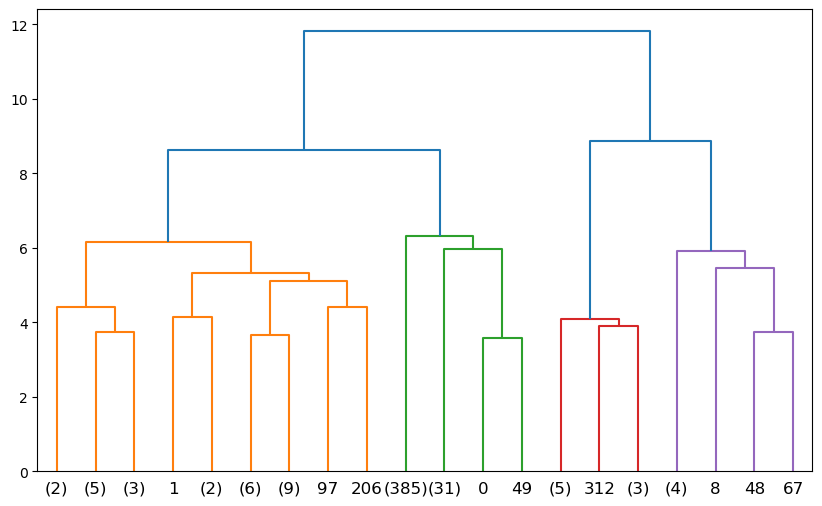

In [36]:
plt.figure(figsize=(10,6))
Z = linkage(df_sc,method='average')
dendrogram(Z,truncate_mode='lastp',p=20)
plt.show()

In [37]:
#So the optimal number of cluster is 2

In [38]:
df_h = df.copy()

In [39]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
agc = AgglomerativeClustering(n_clusters=3,linkage='average')
agc.fit(df_sc)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [41]:
df_h['labels']=agc.labels_

In [42]:
df_h.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,labels
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,0
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
5,3.89,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,0.2,...,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0


# Apply PCA to the original Dataset

In [43]:
x_sc = sc.fit_transform(df_sc)

In [44]:
c=np.cov(x_sc.T)

In [45]:
c

array([[ 1.00215983, -0.29259584, -0.29010878, -0.28831166, -0.07211169,
         0.07322187,  0.00159699, -0.20302582,  0.        ,  0.        ,
         0.        , -0.17428966, -0.10721571, -0.15216162,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.05139729, -0.19322502,  0.        ,  0.        , -0.19322502],
       [-0.29259584,  1.00215983,  0.89863728,  0.9778802 ,  0.27892746,
         0.2176714 ,  0.26661045,  0.718557  ,  0.        ,  0.        ,
         0.        ,  0.19187643,  0.15304459,  0.17762316,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.50929846,  0.66577866,  0.        ,  0.        ,  0.66577866],
       [-0.29010878,  0.89863728,  1.00215983,  0.91205691,  0.31662887,
         0.25183393,  0.32052687,  0.69260274,  0.        ,  0.        ,
         0.        ,  0.21417783,  0.2031632 ,  0.20745008,  0.        ,
         0.        ,  0.        ,  0.        ,  0

In [46]:
eigval,eigvect=np.linalg.eig(c)

In [47]:
eigval

array([ 7.86540981e+00,  2.19149600e+00,  2.42432352e+00,  8.49273909e-01,
        3.48064074e-01,  1.49109796e-01,  1.14972992e-01,  4.83275568e-02,
        2.43203571e-02,  4.07669786e-03,  1.08628695e-02,  2.77796350e-16,
        1.48872821e-15, -2.63347623e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [48]:
eigvect

array([[-7.64961915e-02, -3.08589770e-01, -2.32573824e-02,
        -9.31325474e-01, -1.61730166e-01,  1.11423041e-02,
        -4.74883111e-02,  4.88633066e-02,  9.20228777e-03,
        -2.03593794e-03,  5.04262624e-04, -5.59383712e-16,
         6.56980437e-17, -4.66579062e-16,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.44162740e-01,  3.70448317e-01,  2.72639440e-01,
        -1.53098642e-01,  1.54708073e-03,  2.38498642e-01,
         3.27507299e-01,  3.01751876e-01, -5.39296298e-01,
        -3.07718425e-02,  1.01861160e-01,  2.62561193e-01,
        -1.08724726e-01,  2.08146295e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
    

In [49]:
pc = x_sc.dot(eigvect)
pc

array([[ 7.63920648,  3.64098625,  1.29564974, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.2163701 , -1.55244159, -0.22117312, ...,  0.        ,
         0.        ,  0.        ],
       [-1.35137099,  0.18642653, -0.03752256, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.77495018, -0.49780894, -0.22413247, ...,  0.        ,
         0.        ,  0.        ],
       [-1.82150802, -0.5028779 , -0.24619033, ...,  0.        ,
         0.        ,  0.        ],
       [-1.84058748, -0.55457786, -0.4991874 , ...,  0.        ,
         0.        ,  0.        ]])

In [50]:
var_exp = eigval/sum(eigval)*100

In [51]:
var_exp

array([ 5.60604178e+01,  1.56198067e+01,  1.72792763e+01,  6.05316841e+00,
        2.48081383e+00,  1.06277456e+00,  8.19465753e-01,  3.44452876e-01,
        1.73342447e-01,  2.90565134e-02,  7.74247008e-02,  1.97998322e-15,
        1.06108553e-14, -1.87700045e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [52]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 56.06041785,  71.68022459,  88.95950091,  95.01266932,
        97.49348315,  98.55625771,  99.37572346,  99.72017634,
        99.89351879,  99.9225753 , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        ])

In [53]:
#Scree Plot

In [54]:
len(cum_var_exp.tolist())

25

In [55]:
from matplotlib import pyplot as plt

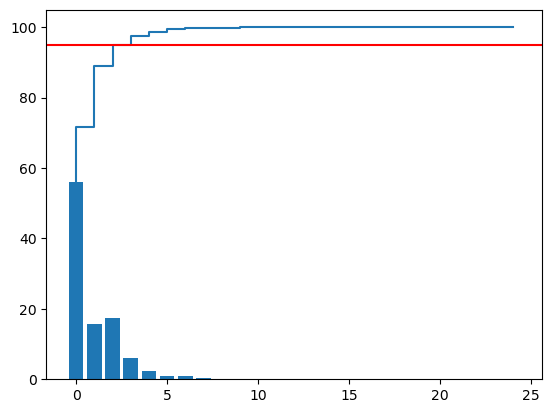

In [56]:
plt.bar(range(25),var_exp)
plt.step(range(25),cum_var_exp)
plt.axhline(95,c='red')
plt.show()

In [57]:
from sklearn.decomposition import PCA

In [85]:
my_pca = PCA(n_components=0.95)

In [86]:
pca2 = my_pca.fit_transform(df_sc)

In [87]:
pca_df = pd.DataFrame(pca2)
pca_df.head()

,0,1,2,3
0,7.639206,-1.295650,-3.640986,-0.538411
1,1.216370,0.221173,1.552442,1.892387
2,-1.351371,0.037523,-0.186427,1.009723
3,-1.743305,0.277623,0.005313,1.079630
4,-0.385906,1.718194,-0.137911,1.129339


In [98]:
pca_df.shape

(464, 5)

In [99]:
df_k['labels'].shape

(464,)

In [108]:
pd.options.display.max_rows = None

In [109]:
pca_df

,0,1,2,3,labels
0,7.639206,-1.295650,-3.640986,-0.538411,0.0
1,1.216370,0.221173,1.552442,1.892387,0.0
2,-1.351371,0.037523,-0.186427,1.009723,0.0
3,-1.743305,0.277623,0.005313,1.079630,NaN
4,-0.385906,1.718194,-0.137911,1.129339,0.0
5,4.330657,-2.018447,-3.685693,-0.524384,0.0
6,-0.195488,-0.733424,-0.957073,0.624559,NaN
7,-1.315317,0.194398,0.272688,1.213695,NaN
8,13.590615,6.613843,1.124995,1.005408,NaN
9,0.753576,-1.181118,-1.157889,0.563140,0.0


In [102]:
df_k.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,labels
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
5,3.89,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,0.2,...,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0


In [103]:
pca_df['labels'] = df_h['labels']

In [111]:
df_h

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,labels
0,3.89,4.18,0.6,2.508,2.5000,0.2,0.50000,6.6800,5.0,0.2,...,0.4,0,0.2,0.0,2.4,8.57400,0.4,0.5,1.714800,0
1,3.89,0.00,0.2,0.000,4.8300,0.2,0.96600,4.8300,5.0,0.2,...,0.4,0,0.2,0.0,2.0,2.55400,0.4,0.5,0.510800,0
2,3.89,0.51,0.2,0.102,0.2300,0.2,0.04600,0.7400,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.54800,0.4,0.5,0.309600,0
4,3.89,0.00,0.2,0.000,0.0800,0.2,0.01600,0.0800,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.41600,0.4,0.5,0.283200,0
5,3.89,0.00,0.2,0.000,0.8300,0.2,0.16600,0.8300,5.0,0.2,...,0.4,0,0.2,0.0,2.0,2.15600,0.4,0.5,0.431200,0
9,3.89,3.98,0.6,2.388,0.9900,0.2,0.19800,4.9700,5.0,0.2,...,0.4,0,0.2,0.0,2.4,4.37200,0.4,0.5,0.874400,0
13,3.89,1.09,0.4,0.436,0.3500,0.2,0.07000,1.4400,5.0,0.2,...,0.4,0,0.2,0.0,2.2,1.90600,0.4,0.5,0.381200,0
14,3.89,0.00,0.2,0.000,0.8400,0.2,0.16800,0.8400,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.56940,0.4,0.5,0.313880,0
15,3.89,1.95,0.4,0.780,9.0100,0.4,3.60400,10.9600,5.0,0.2,...,0.4,0,0.2,0.0,3.0,9.38400,0.4,0.5,1.876800,1
18,3.89,1.81,0.4,0.724,1.0300,0.2,0.20600,2.8400,5.0,0.2,...,0.4,0,0.2,0.0,2.2,2.33000,0.4,0.5,0.466000,0


In [104]:
pca_df.head()

,0,1,2,3,labels
0,7.639206,-1.295650,-3.640986,-0.538411,0.0
1,1.216370,0.221173,1.552442,1.892387,0.0
2,-1.351371,0.037523,-0.186427,1.009723,0.0
3,-1.743305,0.277623,0.005313,1.079630,NaN
4,-0.385906,1.718194,-0.137911,1.129339,0.0


In [61]:
my_pca.explained_variance_

array([7.86540981, 2.42432352, 2.191496  , 0.84927391])

In [62]:
my_pca.explained_variance_ratio_

array([0.56060418, 0.17279276, 0.15619807, 0.06053168])

In [67]:
def randomforest_model_run(X_train,X_test,y_train,y_test):
    rf_clf = RandomForestClassifier(random_state=1,n_estimators=10)
    rf_clf.fit(X_train,y_train)
    y_pred = rf_clf.predict(X_test)
    test_acc = accuracy_score(y_test,y_pred)
    return print('Test Accuracy:',test_acc)

In [69]:
from sklearn.model_selection import train_test_split

In [82]:
X = df_k.drop('labels',axis=1)
y = df_k['labels']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.70,random_state=1)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score,precision_score,classification_report

In [83]:
randomforest_model_run(xtrain,xtest,ytrain,ytest)

Test Accuracy: 1.0


In [74]:
X = df_h.drop('labels',axis=1)
y = df_h['labels']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.70,random_state=1)

In [75]:
randomforest_model_run(xtrain,xtest,ytrain,ytest)

Test Accuracy: 1.0


In [95]:
X = pca_df.drop('labels',axis=1)
y = pca_df['labels']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.70,random_state=1)